# STANDARD EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [ ]:
churn = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Columns Explanation:
1. customerID = Customer ID
2. gender = Whether the customer is a male or a female
3. SeniorCitizen = Whether the customer is a senior citizen or not (1, 0)
4. Partner = Whether the customer has a partner or not (Yes, No)
5. Dependents = Whether the customer has dependents or not (Yes, No)
6. tenure =
Number of months the customer has stayed with the company
7. PhoneService =
Whether the customer has a phone service or not (Yes, No)
8. MultipleLines = Whether the customer has multiple lines or not (Yes, No, No phone service)
9. InternetService = Customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity = Whether the customer has online security or not (Yes, No, No internet service)

In [ ]:
churn.isna().sum() #Tidak ada missing value

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# ubah tipe data 'TotalCharges'
churn = churn.loc[~churn['TotalCharges'].str.contains(' ')] #mengambil baris TotalCharges yang tidak ada ' ' atau string

In [ ]:
churn['TotalCharges'] = churn['TotalCharges'].astype(float) #mengubah tipe data TotalCharges menjadi float

In [ ]:
# mengubah tipe data SeniorCitizen
churn['SeniorCitizen'] = churn['SeniorCitizen'].astype(object)

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [ ]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# mengecek duplikat data
churn.duplicated().sum() #duplikat aman

0

# Data Understanding

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [ ]:
# Mengkelompokan data berdasarkan numeric dan kategorik

numerik = ['tenure','MonthlyCharges', 'TotalCharges']
kategorik = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [ ]:
churn[numerik].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


### Explanation 1:
1. tenure ,
- Nilai mean(32.42) dengan median (29.00). Dapat disimpulkan bahwa mean> median dan dapat diartikan distribusi data tersebut right-skewed.
-Nilai minimum (1 bulan) dan maksimum  (72 bulan) yang merupakan lama waktu pelanggan telah berlangganan. Data menunjukan bahwa ada variasi signifikan dalam durasi pelanggan berlangganan.

2. MonthlyCharges

- Nilai mean(64.79) dengan median (70.35). Dapat disimpulkan bahwa mean<median dan dapat diartikan distribusi data tersebut left-skewed.
-Biaya bulanan minimal (18.25) dan maksimal(118.75), yang menunjukan bahwa biaya bulanan cukup luas.

3. TotalCharges
- Nilai mean(2238.30) dengan median (1397.47). Dapat disimpulkan bahwa mean> median dan dapat diartikan distribusi data tersebut right-skewed.
- Total pembayaran oleh pelanggan maksimal (18.80) dan maksimal(8684.80). Adanya selisih yang besaar antar median dan mean menunjukan bahwa sebagian kecil pelanggan memiliki total pemayaran yang tinggi, dan membuat distribui pada data ini skewed.

In [ ]:
churn[kategorik].describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


### Explanation 2:
1. Mayoritas gender customer adalah Male
2. Customer paling banyak merupakan bukan senior citizen
3. Mayoritas customer tidak memiliki partner
4. Custumer banyak yang tidak memiliki tanggungan
5. Hampir semua customer berlangganan phone service
6. Mayoritas customer tidak berlangganan multiplelines
7. Mayoritas customer berlangganan internet service menggunakan Fiber Optic
8. Customer mayoritas tidak berlangganan online security
9. Mayoritas customer tidak berlangganan online backup
10. Customer paling banyak memilih tidak berlangganan device protection
11. Mayoritas customer tidak berlangganan tech support
12. Customer paling banyak tidak berlangganan streaming TV
13. Mayoritas customer tidak berlangganan streaming movies
14. Contract berlangganan paling banyak month-to-month yang digunakan customer
15. Customer banyak menggunakan paperless billing
16. Metode pembayaran yang paling banyak daigunakan adalah Electronic check
17. Mayoritas customer tidak melakukan churn


In [ ]:
churn['Churn'].value_counts().reset_index() # Bukti bahwa mayoritas customer tidak churn

,Churn,count
0,No,5163
1,Yes,1869


# Univariate Analysis

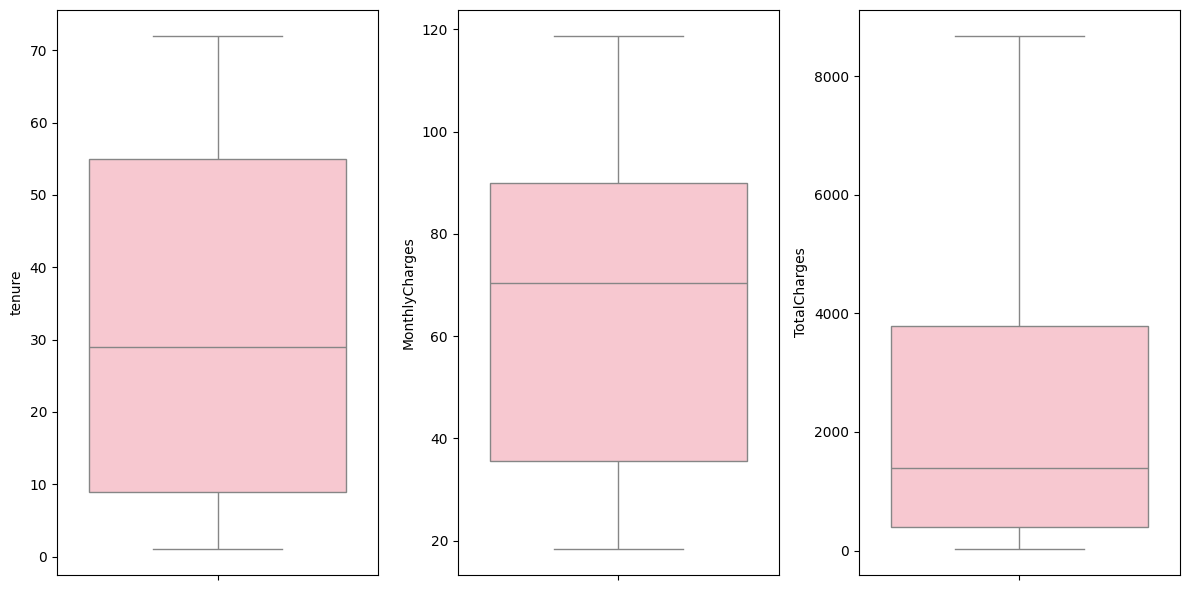

In [ ]:
# mengecek outliers
plt.figure(figsize=(12,6))

for i in range(0,len(numerik)):
  plt.subplot(1, len(numerik),i+1)
  sns.boxplot(y=churn[numerik[i]], color='pink')
  plt.tight_layout()

### Explanation 3
Tidak ada outliers di kolom tenure, MonthlyCharges, TotalCharges

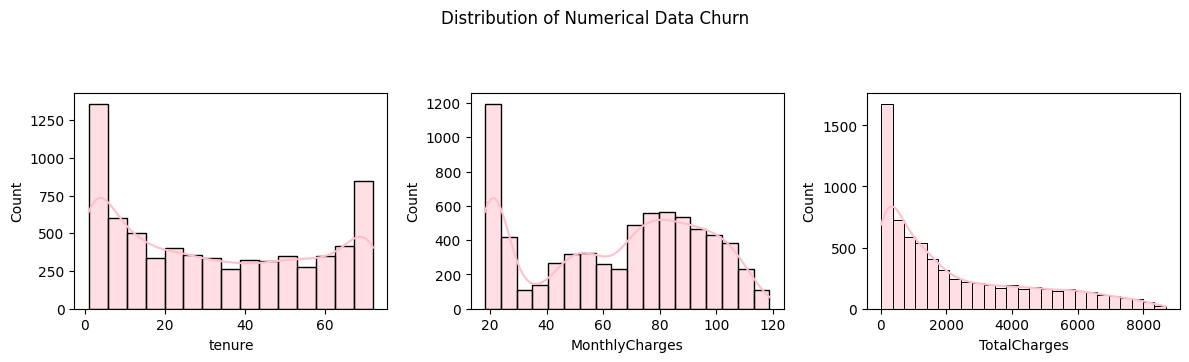

In [ ]:

# Melihat distribusi data
plt.figure(figsize=(12,6))
for i in range(0, len(numerik)):
  plt.subplot(2, len(numerik), i+1)
  sns.histplot(x=churn[numerik[i]], color='pink', kde=True)
  plt.xlabel(numerik[i])
plt.suptitle('Distribution of Numerical Data Churn')
plt.tight_layout(rect= [0,0,1,0.92])

### Explanation 4:
Tenure: Dari chart dapat terlihat bahwa mayoritas pelanggan memiliki nilai rendah, yang dapat diartikan bahwa banyak pelanggan yang baru bergabung. Terdapat dua puncak yang menandakan bahwa terbentuk distribusi bimodal. Namun, jika dilihat dari hasil statistik yan menunjukan bahwa mean > median, maka distribusinya adalah right-skewed.

MonthlyCharges: Distribusi pada chart menunjukan cenderung memiliki ekor panjang di sebelah kanan, yang dapat diartikan bahwa ada beberapa pelanggan yang membayar jauh lebih tinggi dibandingkan yang lain.

TotalCharges: Adanya puncak yang sangat rendah pada bagian kanan histogram menandakan hanya sedikt pelanggan yang memiliki total biaya yang sangat tinggi.

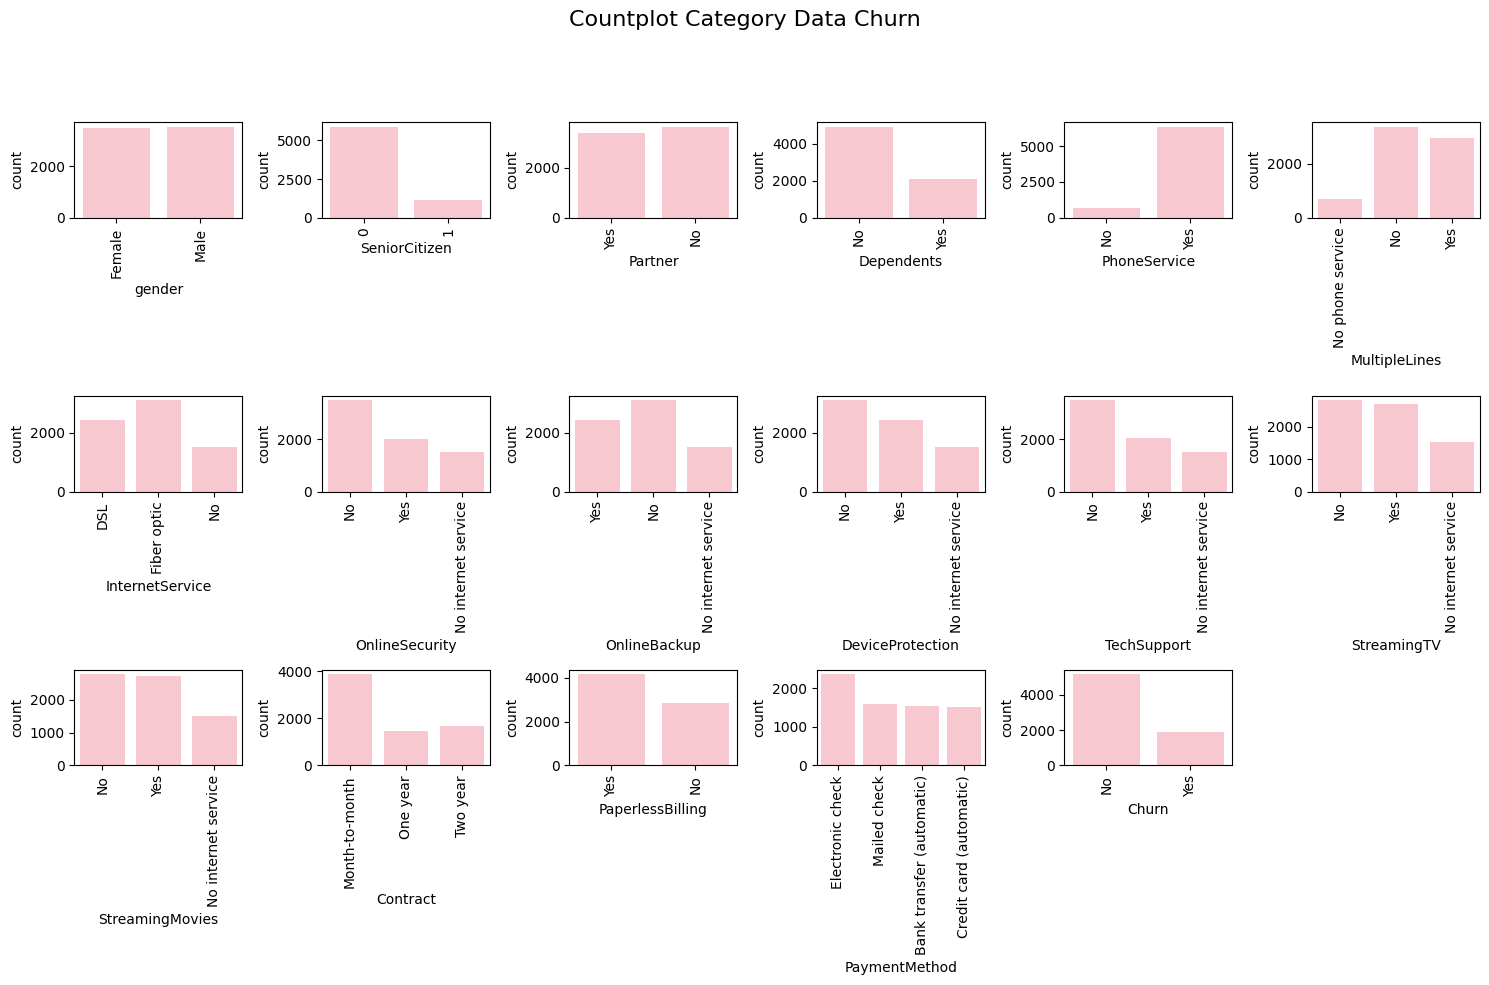

In [ ]:
# countplot data kategorik
plt.figure(figsize=(15,10))

for i in range(0, len(kategorik)):
  plt.subplot(3, 6, i+1)
  sns.countplot(x=churn[kategorik[i]], color='pink')
  plt.xlabel(kategorik[i])
  plt.xticks(rotation=90)


plt.suptitle('Countplot Category Data Churn', fontsize=16)
plt.tight_layout(rect=[0,0,1,0.92])

### Explanation 5:
1. Mayoritas gender customer adalah Male
2. Customer paling banyak merupakan bukan senior citizen
3. Mayoritas customer tidak memiliki partner
4. Custumer banyak yang tidak memiliki tanggungan
5. Hampir semua customer berlangganan phone service
6. Mayoritas customer tidak berlangganan multiplelines
7. Mayoritas customer berlangganan internet service menggunakan Fiber Optic
8. Customer mayoritas tidak berlangganan online security
9. Mayoritas customer tidak berlangganan online backup
10. Customer paling banyak memilih tidak berlangganan device protection
11. Mayoritas customer tidak berlangganan tech support
12. Customer paling banyak tidak berlangganan streaming TV
13. Mayoritas customer tidak berlangganan streaming movies
14. Contract berlangganan paling banyak month-to-month yang digunakan customer
15. Customer banyak menggunakan paperless billing
16. Metode pembayaran yang paling banyak daigunakan adalah Electronic check
17. Mayoritas customer tidak melakukan churn
### ps: sama seperti penjelasan statistik kategorik

# Multivariate Analysis

In [ ]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<ipython-input-21-6eeb9c7d0aef>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:pink'` for the same effect.

  sns.countplot(


Text(0.5, 1.0, 'Customer Distribution Contract by Churn')

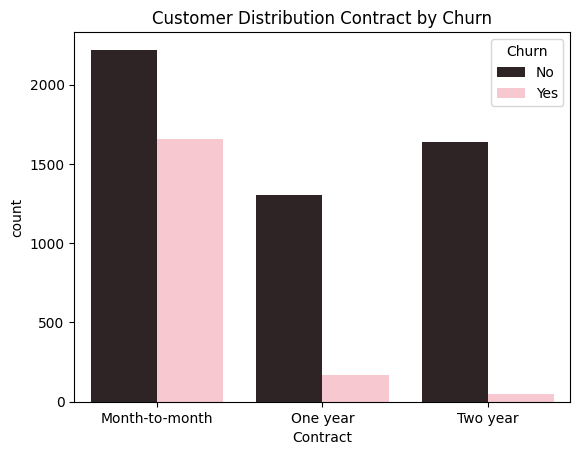

In [ ]:
sns.countplot(
    data= churn, x= 'Contract', hue='Churn', color='pink'
)
plt.title('Customer Distribution Contract by Churn')

### Explanation 6:
1. Customer mayoritas tidak melakukan churn
2. Customer yang tidak melakukan churn dan melakukan churn
 paling banyak berlangganan Month-to-Month

<Axes: >

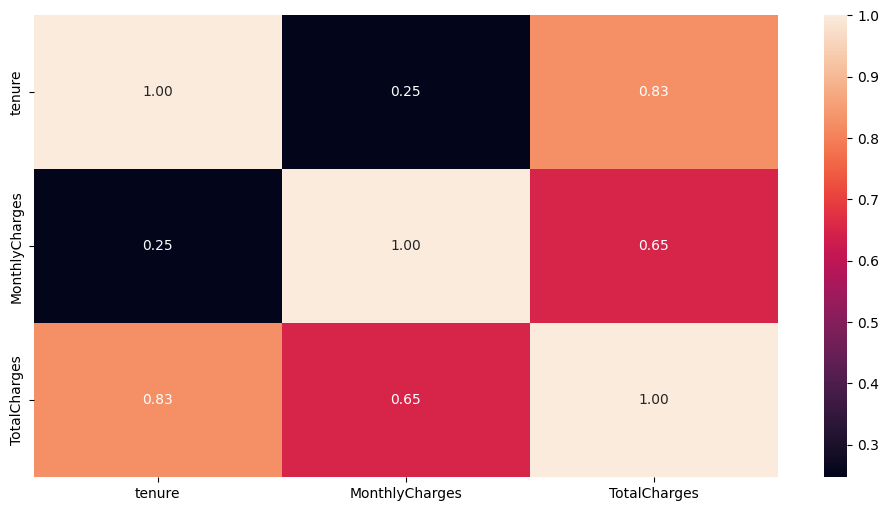

In [ ]:
plt.figure(figsize=(12,6))
korelasi = churn[numerik].corr()
sns.heatmap(korelasi, annot=True, fmt='.2f', color='pink')

### Explanation 7:
Total Charge dan Tenure memiliki hubungan yang positif (berkorelasi)

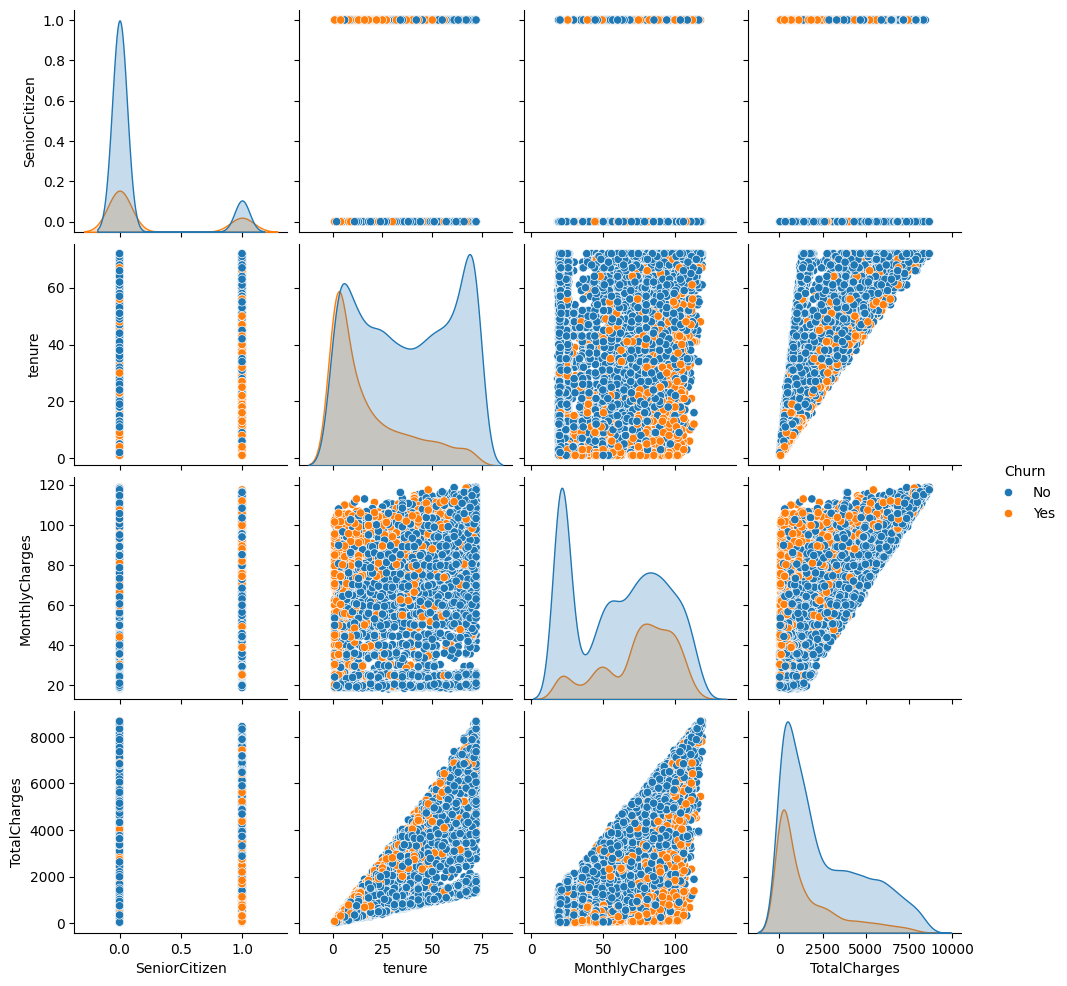

In [ ]:
sns.pairplot(churn, hue='Churn')

### Explanation 8:
1. Senior citizen yang melakukan churn dan tidak sama-sama seimbang
2. Mayoritas pelanggan dengan tenure yang pendek cenderung melakukan churn
3. Mayoritas customer membayarkan monthly charges yang tinggi, mereka cenderung melakukan churn
4. Mayoritas customer membayarkan total charges yang rendah cenderung melakukan churn

### EDA CONCLUSION
1. Data churn tidak ada missing value dan duplikat
2. Pada data churn tidak terdapat outliers
3. Dari heatmap chart dapat dilihat bahwa adanya korelasi antara TotalCharges dengan tenure

# DEEP DIVE EDA <br>
Note:<br>
Q = Question<br>
A = Answer


In [ ]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Q1. <br>
Gender mana yang lebih banyak membeli/berlangganan produk?


In [ ]:
group_gender = (
    churn.groupby('gender')
    .agg(Total_Charges =('TotalCharges', 'sum'))
    .reset_index()
    .sort_values('Total_Charges', ascending=False)
)
group_gender

,gender,Total_Charges
1,Male,8103814.5
0,Female,7952354.2


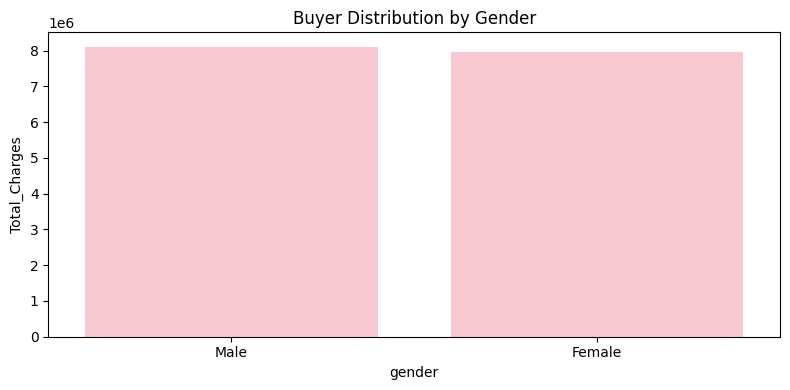

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(data=group_gender, x='gender', y='Total_Charges', color='pink')
plt.title('Buyer Distribution by Gender')
plt.tight_layout()

## A1. <br>
Dari chart terlihat bahwa hampir tidak ada perbedaan total charges antar gender. Namun, jika dilihat lebih detail, Male merupakan gender yang paling banyak menghabiskan uang untuk membeli/berlangganan produk.

<b>Insight<b><br>
Total pembayaran yang paling banyak dilakukan oleh pria, perusahaan dapat mempertimbangkan untuk menargetkan penawaran dan promosi pada segmen ini, untuk meningkatkan pendapatan.

## Q2.
<br>Internet Service mana yang paling banyak digunakan oleh customer?

In [ ]:
churn_sort = churn['InternetService'].value_counts().reset_index()
churn_sort.columns=['InternetService', 'count']
churn_sort= churn_sort.sort_values(by='count', ascending=False)
churn_sort

,InternetService,count
0,Fiber optic,3096
1,DSL,2416
2,No,1520


Text(0.5, 1.0, 'Top Internet Service by Buyer')

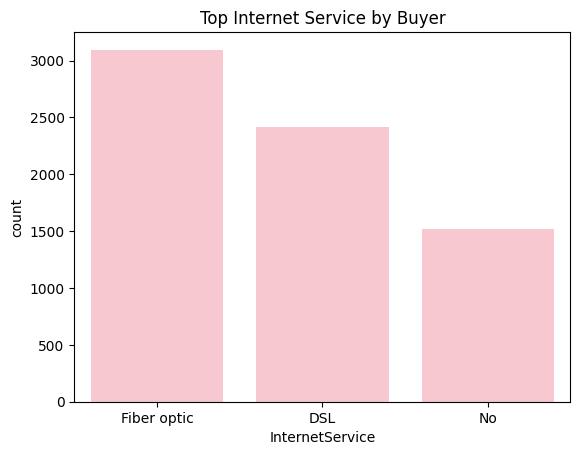

In [ ]:
sns.barplot(churn_sort, x='InternetService', y='count',  color='pink')
plt.title('Top Internet Service by Buyer')

## A2.<br>
Mayoritas customer banyak yang berlangganan internet service Fiber Optic.

<b>Insight<b><br>
Mayoritas customer menggunakan fiber optic dapat menjadi dasar bagi perusahaan untuk strategi marketing ke depannya. Fokus kepada pemasaran fiber optik untuk meningkatkan penjualan dan membantu menarik banyak pelanggan.

### Q3.

Contract mana yang paling banyak melakukan Churn?

In [ ]:
group = (
    churn.groupby('Contract')
    .agg(Total_Churn =('Churn', 'count'))
    .reset_index()
    .sort_values('Total_Churn', ascending=False)
)
group

,Contract,Total_Churn
0,Month-to-month,3875
2,Two year,1685
1,One year,1472


Text(0.5, 1.0, 'Total Churn by Contract')

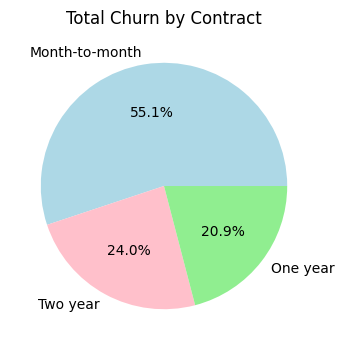

In [ ]:
plt.figure(figsize=(8,4))
plt.pie(group['Total_Churn'], labels= group['Contract'], autopct='%1.1f%%', colors=['lightblue', 'pink', 'lightgreen'])
plt.title('Total Churn by Contract')


### A3.

Paling banyak pelanggan dengan contract Month-to-month melakukan churn.

<b>Insight<b><br>
Untuk mengurangi pelanggan melakukan churn, perusahaan dapat memberikan penawaran kepada pelanggan dengan memberikan diskon atau peningkatan layanan yang menarik untuk mendorong pelanggan agar tetap berlangganan.
